In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("Telecom Customer dataset.csv")

In [12]:
df.head()

,Customer_ID,Monthly_Bill,Call_Drop_Rate,Internet_Speed_Mbps,Customer_Service_Rating,Churn
0,CUST1000,1426.0,NaN,88.9,1.0,Yes
1,CUST1001,1160.0,13.85,4.7,NaN,Yes
2,CUST1002,1430.0,5.39,58.7,2.0,Yes
3,CUST1003,1395.0,4.88,45.0,4.0,Yes
4,CUST1004,1344.0,NaN,67.9,1.0,Yes


In [13]:
df.shape

(150, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              150 non-null    object 
 1   Monthly_Bill             140 non-null    float64
 2   Call_Drop_Rate           140 non-null    float64
 3   Internet_Speed_Mbps      142 non-null    float64
 4   Customer_Service_Rating  141 non-null    float64
 5   Churn                    150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [19]:
df.isnull().sum()

,0
Customer_ID,0
Monthly_Bill,10
Call_Drop_Rate,10
Internet_Speed_Mbps,8
Customer_Service_Rating,9
Churn,0


In [18]:
df.duplicated().sum()

np.int64(0)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

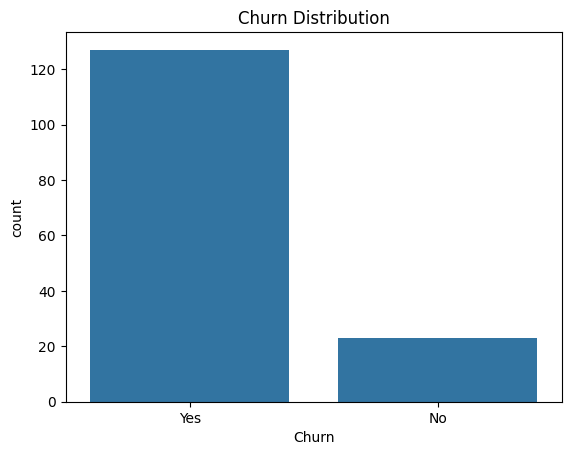

In [21]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

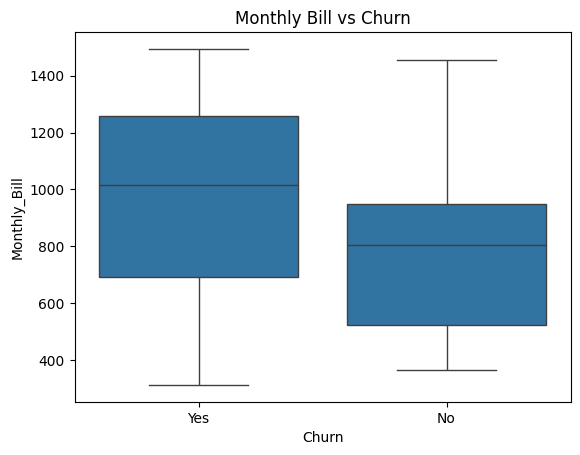

In [22]:
sns.boxplot(x='Churn', y='Monthly_Bill', data=df)
plt.title("Monthly Bill vs Churn")
plt.show()

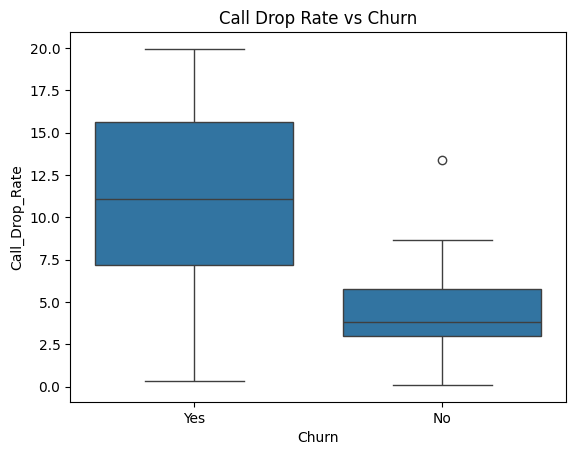

In [23]:
sns.boxplot(x='Churn', y='Call_Drop_Rate', data=df)
plt.title("Call Drop Rate vs Churn")
plt.show()

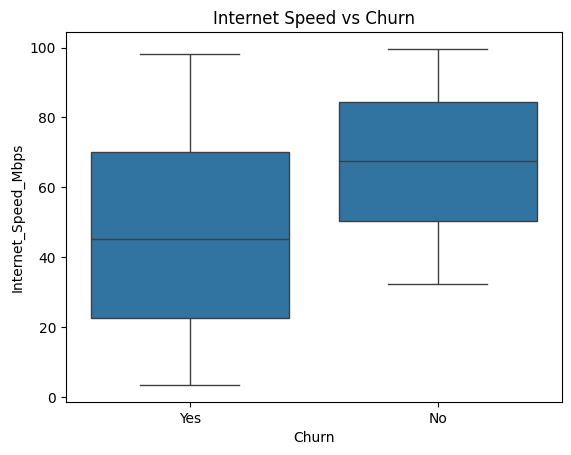

In [24]:
sns.boxplot(x='Churn', y='Internet_Speed_Mbps', data=df)
plt.title("Internet Speed vs Churn")
plt.show()

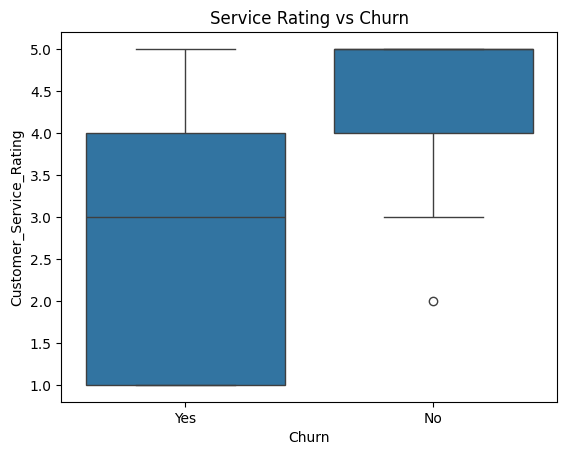

In [25]:
sns.boxplot(x='Churn', y='Customer_Service_Rating', data=df)
plt.title("Service Rating vs Churn")
plt.show()

In [26]:
X = df.drop(['Customer_ID', 'Churn'], axis=1)
y = df['Churn']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [34]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}


In [36]:
from sklearn.impute import SimpleImputer
import pandas as pd

results = []

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

for name, model in models.items():
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)

    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
0,Logistic Regression,0.833333
1,Decision Tree,0.833333
2,Random Forest,0.833333
4,SVM,0.833333
5,Naive Bayes,0.833333
3,KNN,0.800000


In [37]:
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)


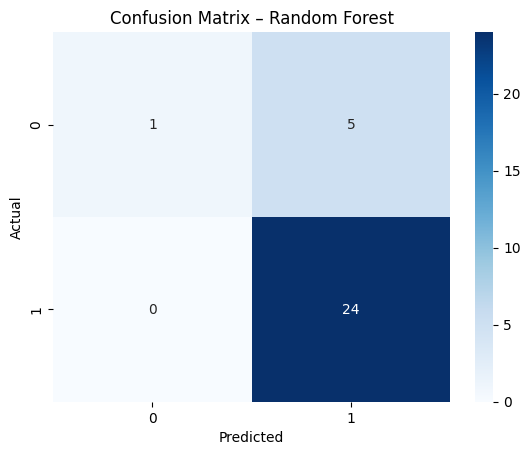

In [38]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      0.17      0.29         6
         Yes       0.83      1.00      0.91        24

    accuracy                           0.83        30
   macro avg       0.91      0.58      0.60        30
weighted avg       0.86      0.83      0.78        30



In [40]:
feature_importance = pd.Series(
    best_model.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance

,0
Call_Drop_Rate,0.423456
Internet_Speed_Mbps,0.209806
Customer_Service_Rating,0.195288
Monthly_Bill,0.171450


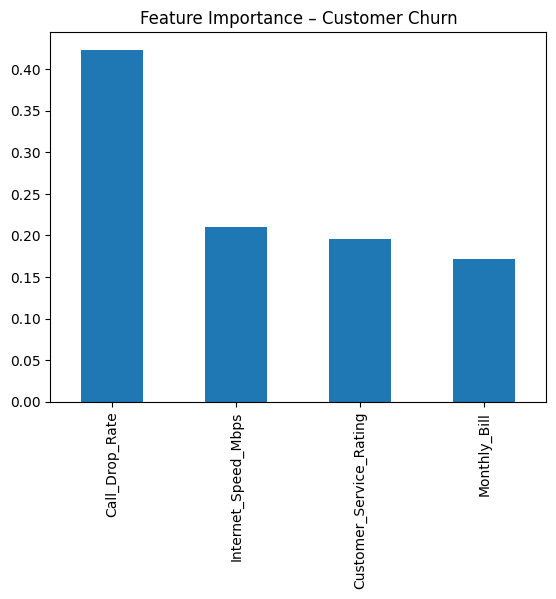

In [41]:
feature_importance.plot(kind='bar')
plt.title("Feature Importance – Customer Churn")
plt.show()
